In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# basan data as size and ribosome prot frac (via R/P) ratio data for three mods
d_b = pd.read_csv('external-data/basan_2015_data.csv')
d_b.head()

,growth_rate_per_hr,media_details,avg_cell_length_um,avg_cell_width_um,estim_avg_cell_volume_um3,nutrient_type,cm_type,useless_type,cm_uM,RNA_ug_per_OD600,prot_ug_per_OD,source,RNA_prot_ratio,source_cell_size,norm_cell_size
0,0.42,Mannose,2.37,0.91,1.36,15,0,0,0,66,391,Basan 2015,0.168798,1.36,1.36
1,0.47,Acetate,2.51,0.98,1.67,14,0,0,0,65,378,Basan 2015,0.171958,1.67,1.67
2,0.70,Glycerol,2.84,0.92,1.70,13,0,0,0,83,355,Basan 2015,0.233803,1.70,1.70
3,0.98,Glucose,2.95,1.07,2.32,12,0,0,0,98,333,Basan 2015,0.294294,2.32,2.32
4,1.29,Glucose + cAA,3.29,1.21,3.33,11,0,0,0,115,317,Basan 2015,0.362776,3.33,3.33


In [3]:
# compute the ribosome proteome fraction based on scott et al. conversion factor
d_b['R_P_ratio'] = d_b['RNA_ug_per_OD600'] / d_b['prot_ug_per_OD']
d_b['phi_R'] = 0.76 * d_b['R_P_ratio']

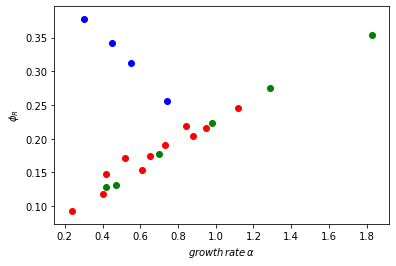

In [4]:
d_nut_only = d_b.query('cm_type == 0 and useless_type == 0').copy()
d_cm = d_b.query('cm_type > 0 and useless_type == 0').copy()
d_useless = d_b.query('cm_type == 0 and useless_type > 0').copy()

for d,c in zip([d_nut_only, d_useless, d_cm],['g', 'r', 'b']):
    plt.scatter(d['growth_rate_per_hr'], d['phi_R'], c=c)
plt.xlabel('$growth \, rate\,\\alpha$')
plt.ylabel('$\phi_R$')
plt.show()

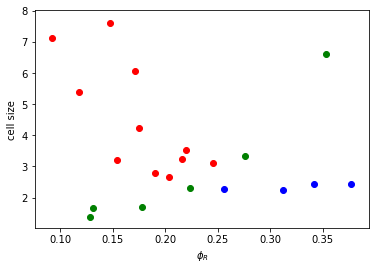

In [5]:
for d,c in zip([d_nut_only, d_useless, d_cm],['g', 'r', 'b']):
    plt.scatter(d['phi_R'], d['estim_avg_cell_volume_um3'], c=c)
plt.ylabel('cell size')
plt.xlabel('$\phi_R$')
plt.show()

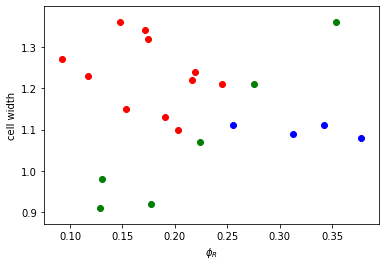

In [6]:
for d,c in zip([d_nut_only, d_useless, d_cm],['g', 'r', 'b']):
    plt.scatter(d['phi_R'], d['avg_cell_width_um'], c=c)
plt.ylabel('cell width')
plt.xlabel('$\phi_R$')
plt.show()

It is clear from the two plots above that the growth rate $\alpha$ alone or $\phi_R$ alone cannot determine cell size !

The relationship between $\phi_R$ and $\alpha$ is the same for nutrient and useless modulation, yet cell size don't go in the same direction.

Let's now focus on the difference in size for the nutrient vs the useless modulation.

For the same growth rate, as we said, phi_R is the same. But phi_E should be different !

In fact, for a fixed media quality, phi_E is expected to decrease in proportion to the growth rate when useless modulation is applied (because the growth rate is the product of phi_E and the nutrient quality, which does not change).

In [7]:
phi_R_max = 0.5
d_nut_only['estim_phi_E'] = phi_R_max - d_nut_only['phi_R']

d_useless['estim_phi_E'] = np.nan
for ir,r in d_useless.iterrows():
    nut_type = r['nutrient_type']
    d_this_nut = d_nut_only.query(f'nutrient_type == {nut_type}')
    d_useless.at[ir,'estim_phi_E'] = d_this_nut['estim_phi_E'] * r['growth_rate_per_hr'] / d_this_nut['growth_rate_per_hr']
    
    
d_cm['estim_phi_E'] = np.nan
for ir,r in d_cm.iterrows():
    nut_type = r['nutrient_type']
    d_this_nut = d_nut_only.query(f'nutrient_type == {nut_type}')
    d_cm.at[ir,'estim_phi_E'] = d_this_nut['estim_phi_E'] * r['growth_rate_per_hr'] / d_this_nut['growth_rate_per_hr']    

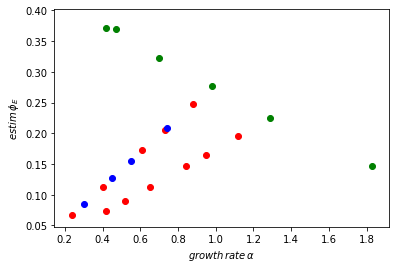

In [8]:
for d,c in zip([d_nut_only, d_useless, d_cm],['g', 'r', 'b']):
    plt.scatter(d['growth_rate_per_hr'], d['estim_phi_E'], c=c)
plt.xlabel('$growth \, rate\,\\alpha$')
plt.ylabel('$estim\,\phi_E$')
plt.show()

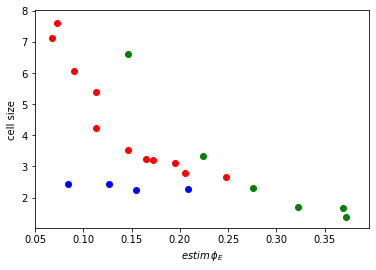

In [9]:
for d,c in zip([d_nut_only, d_useless, d_cm],['g', 'r', 'b']):
    plt.scatter(d['estim_phi_E'], d['estim_avg_cell_volume_um3'], c=c)
plt.ylabel('cell size')
plt.xlabel('$estim\,\phi_E$')
plt.show()

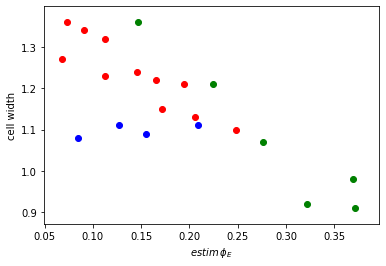

In [10]:
for d,c in zip([d_nut_only, d_useless, d_cm],['g', 'r', 'b']):
    plt.scatter(d['estim_phi_E'], d['avg_cell_width_um'], c=c)
plt.ylabel('cell width')
plt.xlabel('$estim\,\phi_E$')
plt.show()

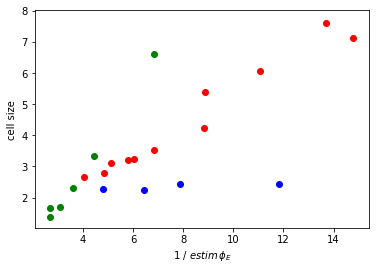

In [11]:
for d,c in zip([d_nut_only, d_useless, d_cm],['g', 'r', 'b']):
    plt.scatter(1/d['estim_phi_E'], d['estim_avg_cell_volume_um3'], c=c)
plt.ylabel('cell size')
plt.xlabel('1 / $estim\,\phi_E$')
plt.show()

In [12]:
for d in [d_nut_only, d_useless, d_cm]:
    d['translation_efficiency'] = d['growth_rate_per_hr'] / d['phi_R']

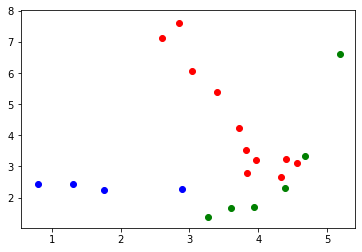

In [13]:
for d,c in zip([d_nut_only, d_useless, d_cm],['g', 'r', 'b']):
    plt.scatter(d['translation_efficiency'],
                d['estim_avg_cell_volume_um3'], c=c)
plt.show()

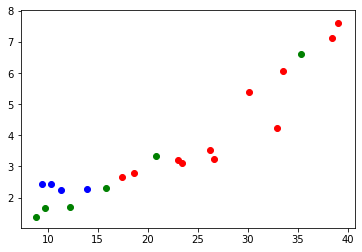

In [14]:
for d,c in zip([d_nut_only, d_useless, d_cm],['g', 'r', 'b']):
    plt.scatter(d['translation_efficiency']/d['estim_phi_E'],
                d['estim_avg_cell_volume_um3'], c=c)
plt.show()

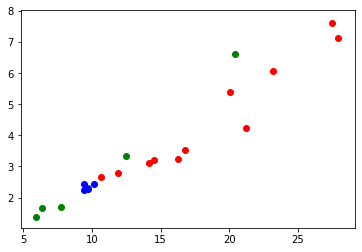

In [15]:
for d,c in zip([d_nut_only, d_useless, d_cm],['g', 'r', 'b']):
    plt.scatter(np.power(d['translation_efficiency'],2/3)/d['estim_phi_E'],
                d['estim_avg_cell_volume_um3'], c=c)
plt.show()